[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1EZsm_a21MMVo7y_2tg2O5B9B_c6bRxTy?usp=sharing)


## Foundations of Embedding Models

### Word Embedding Models

Let's take a look at the 'King - Man + Woman = Queen' example.

First, we install relevant modules.

In [ ]:
!pip install gensim

We could load a pre-trained Word2Vec model in here but these models can take a while to download so instead, we’ll use an alternative word embedding generation tool: GloVe. This can still take a little bit of time to download but it's worth it!

In [ ]:
# Import relevant modules
import gensim.downloader as api

# Download and load the GloVe model
glove_model = api.load("glove-wiki-gigaword-50")

# Perform the vector arithmetic: king - man + woman
result = glove_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

result

[==================================================] 100.0% 66.0/66.0MB downloaded


[('queen', 0.8523604273796082)]

Ta-da! The vector embedding corresponding to the word 'queen' was the closest match to the vector arithmetic performed above! Awesome!

We can now create our own Word2Vec model with our own sentences. Each of these sentences contain the word 'scale' but in different contexts.

In [ ]:
# Import relevant modules
from gensim.models import Word2Vec

# Define your sentences
sentences = [
    ["The", "fisherman", "removed", "one", "scale", "from", "the", "fish"],
    ["The", "architect", "drew", "the", "plans", "to", "scale"],
    ["The", "company", "decided", "to", "scale", "up", "production"]
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=10, window=5, min_count=1)
# Obtain the vector embedding corresponding to the word 'scale'
embedding_scale = model.wv['scale']
embedding_scale

array([-0.0053659 ,  0.0023273 ,  0.051031  ,  0.09011646, -0.09301799,
       -0.07114912,  0.06461012,  0.08979519, -0.05018128, -0.03761054],
      dtype=float32)

Notice how we've created an embedding for the word 'scale' despite it having different contexts in each sentence. To overcome this, we can use BERT. BERT is a word embedding model that produces embeddings that are much richer and encode the context of words.

### Sentence Embeddings

Beyond words, these models can be extended to generate sentences and event document embeddings!

First, import relevant modules:

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

Next, initiate the sentence transformer model

In [ ]:
# Import relevant modules
from sentence_transformers import SentenceTransformer

# Initiate the sentence transformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

We can create some sentences we wish to embed. We've taken these from [Marqo](https://www.marqo.ai/)'s website.

In [ ]:
# Create some sentences!
marqo_sentences = [
		"Join our community to discuss and ask questions",
    "Use your data to increase relevance with embedding search with Marqo",
    "AI search that understands the way your customers think",
    "Request Your Marqo Demo Today"
]

All that's left to do is create the embeddings!

In [ ]:
# Create the embeddings
embeddings = model.encode(marqo_sentences)
embeddings

array([[ 0.40755296,  0.4846012 ,  1.7139225 , ...,  0.48527807,
        -0.16145733, -0.26886165],
       [-0.10421544,  0.04392781,  1.9816391 , ..., -1.1041645 ,
        -0.6477818 , -0.19729616],
       [-0.31245297,  0.3985917 ,  1.3437531 , ..., -0.4828734 ,
        -1.2322669 ,  0.49748766],
       [-0.01495009, -0.15959197,  2.4080443 , ..., -0.33195576,
         0.3458711 , -0.31836212]], dtype=float32)

We can look at the shape of the embedding.

In [ ]:
embeddings.shape

(4, 768)

This tells us we have 4 vectors of dimension equal to 768.

### Question-Answering

A conventional approach to performing Question-Answering inference is using Hugging Face’s BERTforQuestionAnswering class. Let's see it in action!

First, import relevant modules

In [ ]:
# Import relevant modules
from transformers import BertForQuestionAnswering, AutoTokenizer
from transformers import pipeline

Let's load the model and tokenizer.

In [ ]:
# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("SpanBERT/spanbert-large-cased")
model = BertForQuestionAnswering.from_pretrained("mrm8488/spanbert-large-finetuned-squadv2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/667M [00:00<?, ?B/s]

Next, we create the pipeline to perform question and answering. We also define our question and the context around it.

In [ ]:
# Create the pipeline for question answering
nlp = pipeline("question-answering", model=model, tokenizer=tokenizer)

# Define question and context - change this if you wish!
question = "What is the highest mountain in the world?"
context = "Mount Everest is the highest mountain in the world"

# Input the data into our pipeline
data = {'context': context, "question": question}
# Generate predictions
predictions = nlp(data)
print(predictions)

{'score': 0.9971988201141357, 'start': 0, 'end': 13, 'answer': 'Mount Everest'}


The result indicates that the model identifies "Mount Everest" as the answer to the question "What is the highest mountain in the world?" based on the context provided.

Let's take a look at an example of Dense Passage Retrieval (DPR).

Import relevant modules as always.

In [ ]:
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer, DPRContextEncoder, DPRContextEncoderTokenizer

Next, we load the model and tokenizer for both the question and the context.

In [ ]:
question_model = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

context_model = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
context_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.


Let's generate some questions and context.

In [ ]:
questions = [
    "what is the largest planet in our solar system?",
    "what is the capital city of England?",
    "how many bones are there in an adult human body?"
]

contexts = [
    "The largest planet in our solar system is Jupiter.",
    "What is the largest planet in our solar system?",
    "Mars is the next planet outwards from Earth",
    "what is the capital city of England?",
    "London is the capital city of England",
    "York was the old capital city of England",
    "how many bones are there in an adult human body?",
    "there are 206 bones in the adult human body",
    "the largest bone in the body is the femur"
]

Now, let's create the embeddings.

In [ ]:
# Converts question text into token IDs
query_tokens = question_tokenizer(
    questions,              # list of questions to be tokenized
    max_length=256,         # Maximum length of tokenized sequence
    padding='max_length',   # Ensures all input sequences have the same length
    truncation=True,        # Truncates sequences longer than max_length
    return_tensors='pt'     # Returns sequences as tensors
)

# Pass the tokenized questions through 'question_model' to obtain the embeddings
query = question_model(**query_tokens)

# Converts context text into token IDs. Same arguments as above.
context_tokens = context_tokenizer(
    contexts,
    max_length=256,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Pass the tokenized context through 'context_model' to obtain the embeddigns
context = context_model(**context_tokens)

We can now take each of the generated vector embeddings and see which are closest in the vector space.

In [ ]:
import torch
from sentence_transformers.util import cos_sim

# Loop through each query vector (embedding) generated by the question model
for i, query_vec in enumerate(query.pooler_output):
    # Calculate the cosine similarity between the current query vector and all context vectors
    probs = cos_sim(query_vec, context.pooler_output)

    # Find the index of the context vector with the highest cosine similarity to the current query vector
    argmax = torch.argmax(probs)

    # Print the original question
    print('Question:', questions[i])

    # Print the context that has the highest similarity to the question
    print('Answer:', contexts[argmax])
    print('')

Question: what is the largest planet in our solar system?
Answer: The largest planet in our solar system is Jupiter.

Question: what is the capital city of England?
Answer: London is the capital city of England

Question: how many bones are there in an adult human body?
Answer: there are 206 bones in the adult human body



In this example, DPR correctly identified the answer to our questions. DPR is not always the most accurate method but this example has highlighted it’s capability for a small set of questions and corresponding context. Pretty cool!

### Vision Transformers

We’ve already established that word embeddings transform text into numerical representations but can we do the same with images? The answer is yes! Vision Transformers (ViTs) divide images into fixed-size patches and embed these patches into vectors. These are then fed into the transformer model. This allows ViTs to capture complex information within an image, much like how we’ve already established with words and sentences.

We will take three different images of cats from Unsplash. Let’s display these.

In [ ]:
# Import relevant modules
from PIL import Image
from IPython.display import display
from io import BytesIO
from transformers import CLIPProcessor, CLIPModel
import requests
import matplotlib.pyplot as plt
import numpy as np

# Create a list of urls. These are the urls corresponding to the images of the cats.
urls = [
    "https://images.unsplash.com/photo-1580280949881-ca923b8afda4?q=80&w=654&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
    "https://images.unsplash.com/photo-1566513317351-c6d7be11505e?q=80&w=994&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D",
    "https://images.unsplash.com/photo-1541781774459-bb2af2f05b55?q=80&w=1460&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
]

#  Take a list of image URLs, download each image, and open them
images = [Image.open(BytesIO(requests.get(url).content)) for url in urls]

# Display images
for image in images:
    display(image)

We create the model and processor.

In [ ]:
# Load CLIP model and processor
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

We will create a list of captions containing the true captions as well as fake ones.

In [ ]:
captions = ["a cat sleeping",
            "a cat yawning",
            "a cat jumping",
            "a motorbike on a road",
            "rainbow in the sky",
            "a water bottle"]

We now process the captions and images as follows.

In [ ]:
# Process captions and images
inputs = processor(
    text=captions,         # input the captions
    images=images,         # inputs the images
    return_tensors='pt',   # returns pytorch tensors
    padding=True           # ensures sequences all the same length
)

All that’s left to do is get the predictions and display the results! Let’s get the predictions first.

In [ ]:
# Get predictions
outputs = model(**inputs)
probs = outputs.logits_per_image.argmax(dim=1)

Now we can display the images with their corresponding, predicted captions.

Predicted Caption: a cat yawning


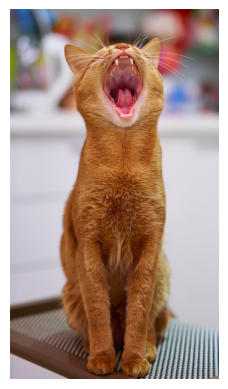

Predicted Caption: a cat jumping


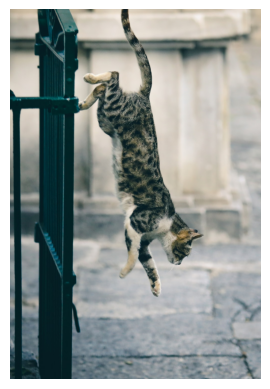

Predicted Caption: a cat sleeping


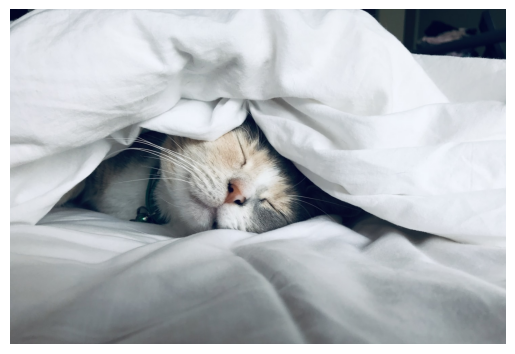

In [ ]:
# Display images with predicted captions
for i, image in enumerate(images):
    argmax = probs[i].item()
    print(f"Predicted Caption: {captions[argmax]}")
    plt.imshow(np.asarray(image))
    plt.axis('off')
    plt.show()

Pretty cool!